# Regresión Linear Simple (Python)
---
La regresión linear utiliza el método de mínimos cuadrados para encontrar la recta que resulta en la menor suma de errores al cuadrado (RMSE: Root Mean Square Error).  

La palabra simple se refiere a que la variable respuesta solo depende de 1 variable independiente: Y = f(X)


## Escenario del problema
---

<img src='../Imagenes/experiencia.png' style='width:12%;height:12%;float:left;margin-right:20px'>
Queremos encontrar la relación que existe entre los años de experiencia profesional y el salario que podemos esperar tener cuando lo hayamos conseguido.  
¡Vamos a ello!

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Importar datos
datos = pd.read_csv('../Datos/4.1.Salarios.csv')
datos.head()

,Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# 3. Crear variable y respuesta
X = datos['Experiencia'].values.reshape(-1,1) # Como X solo tiene 1 tenemos que 'reshape' para asegurar que siga siendo una matrix (array) y no un vector (-1,)
y = datos['Salario'].values

In [4]:
# 4. Separar en Entranamiento y Validación
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.3, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (21, 1)
La forma de y_train es:  (21,)
La forma de X_test es:  (9, 1)
La forma de y_test es:  (9,)


In [ ]:
# 5. Escalar los datos
'''
En este caso no es necesario porque sklearn ya se encarga.

escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train)
X_test  = escaladorX.transform(X_test)

escaladorY = MinMaxScaler()
y_train = escaladorY.fit_transform(y_train)
y_test  = escaladorY.transform(y_test)
'''

In [5]:
# 6. Importar el modelo
from sklearn.linear_model import LinearRegression as LR
regresor = LR()
regresor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# 7. Hacer las predicciones (predicciones -> y_pred)
y_fit = regresor.predict(X_train) # Valores ajustados durante el entrenamiento
y_pred = regresor.predict(X_test)  # Valores resultantes con la nueva información

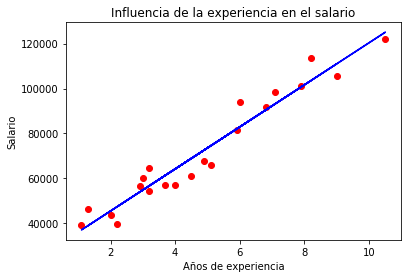

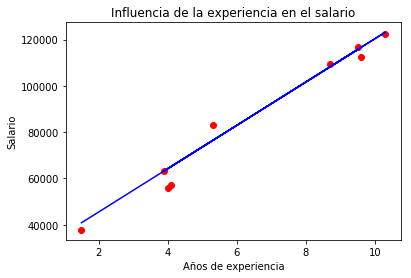

In [7]:
# 8. Echemos un vistazo a la pinta que tienen nuestras predicciones
# 8.1. Para el conjunto de entrenamiento
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_fit, color = 'blue')
plt.title('Influencia de la experiencia en el salario')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

# 8.2. Para el conjunto de validación
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Influencia de la experiencia en el salario')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

In [8]:
# 9. Cálculo del error
from statsmodels.tools.eval_measures import rmse
RMSE = np.sum(rmse(y_pred, y_test))/len(y)
print('RMSE = ', RMSE)

RMSE =  161.142031212


# Conclusión
---
Hemos visto como la RLS establece una relación lineal entre la variable independiente (predictor) y la variable dependiente (respuesta) en función de los datos disponibles en el conjunto de entrenamiento, y como aplica esta función para obtener nuevas prediciones con la nueva información disponible en el conjunto de validación.